# Introduction

This notebook is to compute the differential or total scattering cross sections of a single cylinder or a single sphere.

Requirements: 
* numpy
* scipy (checked only in version 1.9.2)
* matplotlib
* os

Run [Libraries](#libraries) first, and then run other cells in [A cylinder](#an-infinitely-long-cylinder) or [A sphere](#a-single-sphere).

See Secs. 9 and 15 of 
* Hendrik Christoffel Van de Hulst, Light Scattering by Small626
Particles (John Wiley & Sons, Inc., New York, 1957).



# Libraries

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.size': 15, "text.usetex": True,
    "font.family": "Times New Roman"})
matplotlib.rcParams.update({"xtick.direction":"in", "xtick.top":True})
matplotlib.rcParams.update({"ytick.direction":"in", "ytick.right":True})
plt.rcParams['text.latex.preamble'] = r'\usepackage{physics}'

import scipy.special as sp

import scipy

def latex_float(f, significant_figure = 2):
    spec = "{0:1."+"{0:d}".format(significant_figure)+"e}"
    float_str = spec.format(f)#"{0:.2g}".format(f)
    if "e" in float_str:
        base, exponent = float_str.split("e")
        exponent = int(exponent)
        if exponent == 0:
            return r"{0}".format(base, int(exponent))
        elif exponent == 1:
            return r"{0} \times 10".format(base, int(exponent))
        else:
            return r"{0} \times 10^{{{1}}}".format(base, int(exponent))
    else:
        return float_str
    
def power_law(x, a, b):
	return a * x ** b


from os import path
import sys
dir="./script"

sys.path.insert(1, dir)
import MieCylinder as MC
dsigma_C = MC.dsigma_
sigma_C = MC.sigma_

import MieSphere as MS
dsigma_S = MS.dsigma_
sigma_S = MS.sigma_

# An infinitely long cylinder

* A single cylinder of radius $a$ and dielectric constant $\varepsilon$ is placed in a vacuum matrix. 
* Linearly polarized light is incident to the cylinder perpendicularly to the axis of this cylinder.
* Transverse electric (TE) and transverse magnetic (TE) polarizations are considered.

In [35]:
%load_ext autoreload
%autoreload 1
%aimport MieCylinder

import MieCylinder as MC
dsigma_C = MC.dsigma_
sigma_C = MC.sigma_


## Some closed-form expressions to compare with the Mie scattring cross section.

def dsigma_C_Rayleigh(ka,eps,thetas):
    """
    Dimensionless differential scattering cross section for Rayleigh scattering (cylinder), divided by a.

    Parameters
    ----------
    ka : float or np.ndarray
        Dimensionless wavenumber (k*a).
    eps : float
        Relative dielectric constant of the sphere.
    thetas : float or np.ndarray
        Scattering angles in radians.

    Returns
    -------
    np.ndarray
        Differential scattering cross section values at scattering angles.
    """
    beta = (eps-1)/(eps+1)
    TE = 2* np.pi**2/4 *ka**3 * beta**2 / np.pi * np.cos(thetas)**2
    TM = 2* np.pi**2/8 *ka**3 * (eps-1)**2 / (2*np.pi) * np.ones(np.shape(thetas))

    return np.column_stack((TE,TM))

def sigma_C_Rayleigh(ka,eps:float):
    """
    Dimensionless total scattering cross section for Rayleigh scattering (sphere), divided by a^2.

    Parameters
    ----------
    ka : float or np.ndarray
        Dimensionless wavenumber (k*a).
    eps : float
        Relative dielectric constant of the sphere.

    Returns
    -------
    np.ndarray
        Total scattering cross section values.
    """
    beta = (eps-1)/(eps+1)
    TE = 2* np.pi**2/4 *ka**3 * beta**2
    TM = 2* np.pi**2/8 *ka**3 * (eps-1)**2

    return np.column_stack((TE,TM))


def FormFactor_2D(ka, eps, thetas):
    beta = (eps-1)/(eps+1)
    q = 2*ka*np.sin(thetas/2)

    TE = (beta* np.pi*ka**2/np.sqrt(2) * sp.jv(1,q) / q )**2   * 2/(np.pi*ka)
    TM = ((eps-1)* np.pi*ka**2/2 * sp.jv(1,q) / q )**2  * 2/(np.pi*ka)

    return np.column_stack((TE, TM))


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Differential scattering cross section

\begin{align}
\frac{d\sigma_s}{d\Omega}
\end{align}
is a function of the dimensionless wavenumber $x=ka$, refractive index $m$, and scattering angle $\theta$.

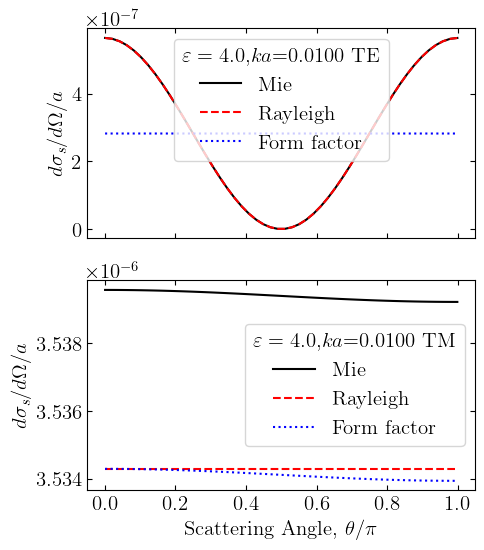

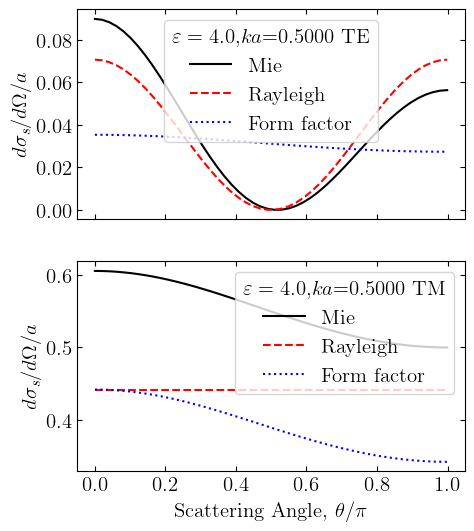

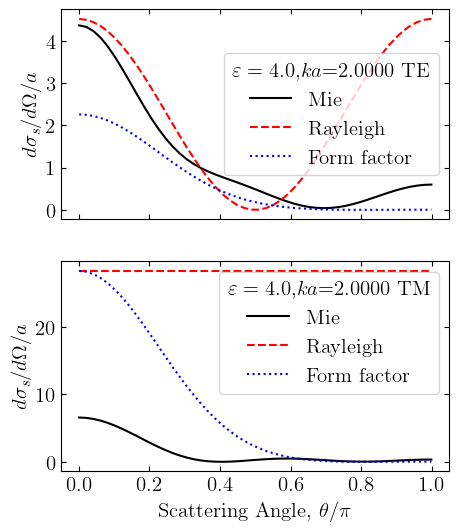

In [19]:
# TE, full

x = np.linspace(0.001, 1-0.001)
eps = 4
for ka in [0.01,0.5,2]:
    fig, ax = plt.subplots(2,1,figsize=(5,6),sharex=True)

    y1 = dsigma_C(ka, eps, np.pi*x)
    y2 = dsigma_C_Rayleigh(ka, eps, np.pi*x)
    y3 = FormFactor_2D(ka, eps, np.pi*x)

    for i in range(2):
        ax[i].plot(x,y1[:,i], 'k-', label='Mie')
        ax[i].plot(x,y2[:,i], 'r--',label='Rayleigh')
        ax[i].plot(x,y3[:,i], 'b:',label='Form factor')
        ax[i].set(ylabel=r'$d \sigma_s / d \Omega /a$'
           )
    ax[0].legend(title=r'$\varepsilon={:0.1f}$,$ka$={:0.4f}'.format(eps,ka)+' TE')
    ax[1].legend(title=r'$\varepsilon={:0.1f}$,$ka$={:0.4f}'.format(eps,ka)+' TM')
    ax[1].set(xlabel=r'Scattering Angle, $\theta/\pi$')

At the modest values of the dielectric contrasts, the Mie differential scattering cross sections are significantly different from those from Rayleigh theory or the form factor; see above.

In the following, we will compare the leading order contribution in $\beta=(\varepsilon-1)/(\varepsilon+1)$ for TE [or, $(\varepsilon-1)$ for TM] of the Mie scattering cross sections to the Rayleigh prediction and the squared form factors.

We show that for TM, the leading-order contribution of the Mie differential scattering cross section is identical to the squared form factor. 

* TE: leading-order term in $(\varepsilon-1)/(\varepsilon+1)$
* TM: leading-order term in $(\varepsilon-1)$


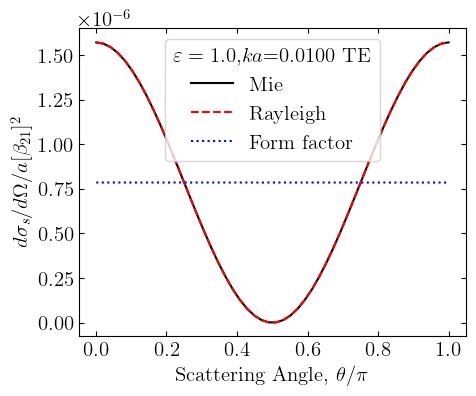

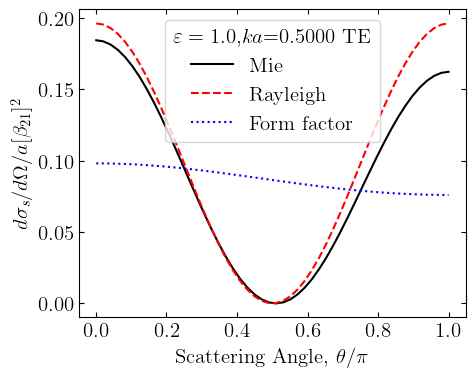

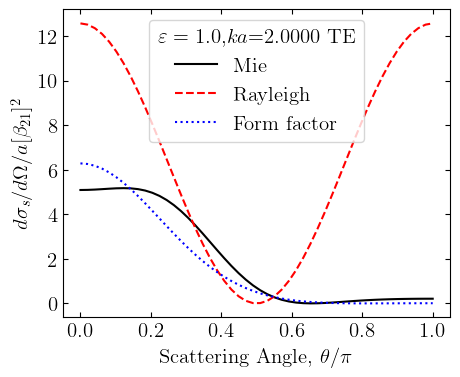

In [29]:
# TE

x = np.linspace(0.001, 1-0.001)
eps = 1.01
for ka in [0.01,0.5,2]:
    fig, ax = plt.subplots(1,1,figsize=(5,4),sharex=True)

    y1 = dsigma_C(ka, eps, np.pi*x, 50, True)
    y2 = dsigma_C_Rayleigh(ka, eps, np.pi*x)
    y3 = FormFactor_2D(ka, eps, np.pi*x)
    factor = ((eps-1)/(eps+1))**2

    ax.plot(x,y1[:,0]/factor, 'k-', label='Mie')
    ax.plot(x,y2[:,0]/factor, 'r--',label='Rayleigh')
    ax.plot(x,y3[:,0]/factor, 'b:',label='Form factor')
    ax.set(ylabel=r'$d \sigma_s / d \Omega /a [\beta_{21}]^2$'
        )
    ax.legend(title=r'$\varepsilon={:0.1f}$,$ka$={:0.4f}'.format(eps,ka)+' TE')
    #ax[1].legend(title=r'$\varepsilon={:0.1f}$,$ka$={:0.4f}'.format(eps,ka)+' TM')
    ax.set(xlabel=r'Scattering Angle, $\theta/\pi$')

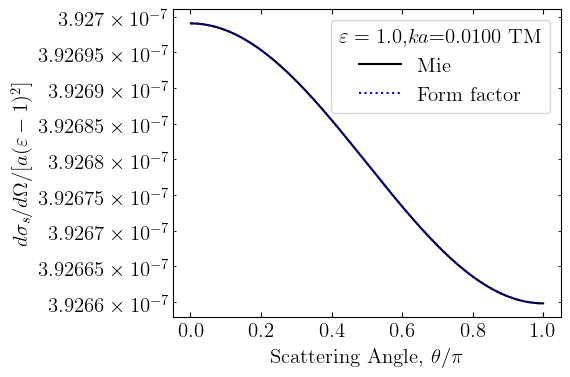

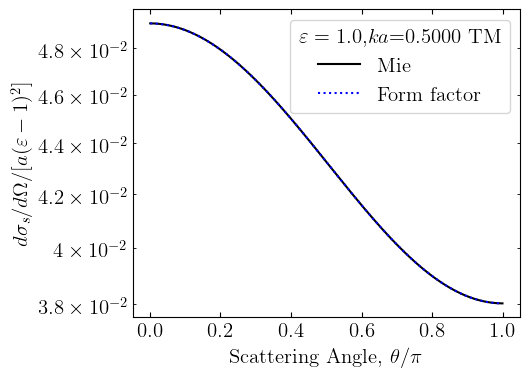

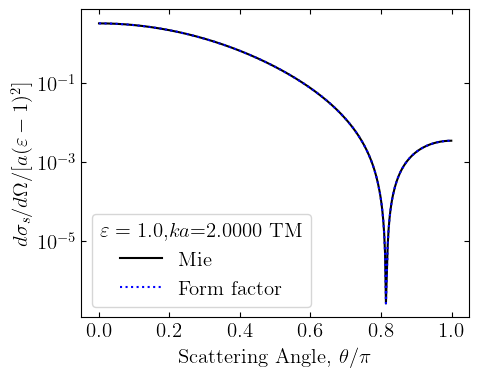

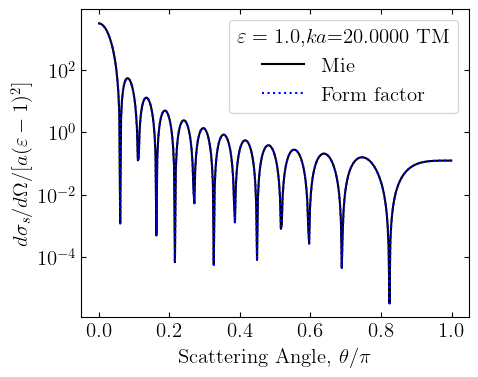

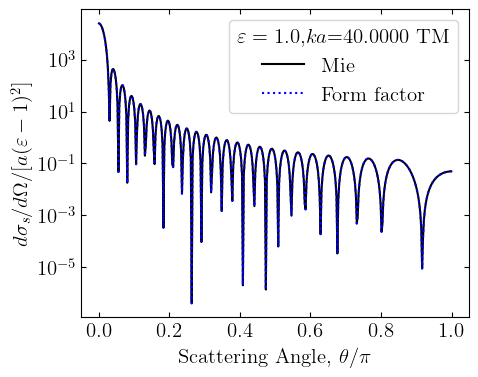

In [38]:
# TM, 

x = np.linspace(0.001, 1-0.001, 400)
eps = 1.01
for ka in [0.01,0.5,2 ,20, 40]:
    fig, ax = plt.subplots(1,1,figsize=(5,4),sharex=True)

    y1 = dsigma_C(ka, eps, np.pi*x, 50, True)
    y2 = dsigma_C_Rayleigh(ka, eps, np.pi*x)
    y3 = FormFactor_2D(ka, eps, np.pi*x)
    factor = (eps-1)**2

    ax.plot(x,y1[:,1]/factor, 'k-', label='Mie')
    #ax.plot(x,y2[:,1], 'r--',label='Rayleigh')
    ax.plot(x,y3[:,1]/factor, 'b:',label='Form factor')
    ax.set(ylabel=r'$d \sigma_s / d \Omega /[a (\varepsilon-1)^2]$'
        )
    ax.legend(title=r'$\varepsilon={:0.1f}$,$ka$={:0.4f}'.format(eps,ka)+' TM')
    ax.set(yscale='log')
    #ax[1].legend(title=r'$\varepsilon={:0.1f}$,$ka$={:0.4f}'.format(eps,ka)+' TM')
    ax.set(xlabel=r'Scattering Angle, $\theta/\pi$')

## Total scattering cross section

\begin{align}
\sigma_s = \int_{0}^{2\pi} \frac{d\sigma_s}{d\Omega} d \theta
\end{align}
is a function of the dimensionless wavenumber $x=ka$, and refractive index $m$.

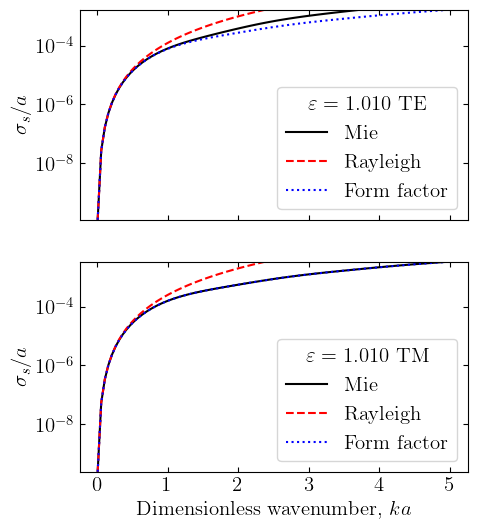

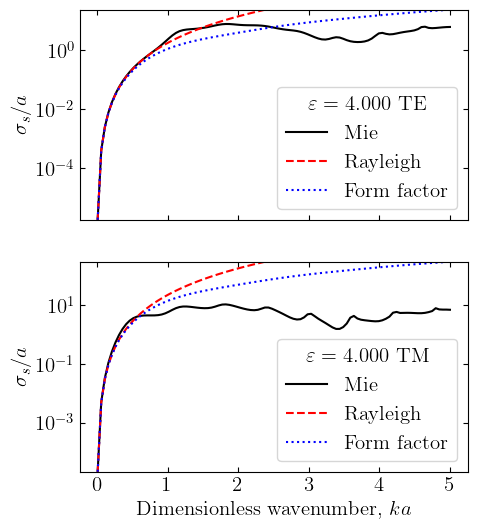

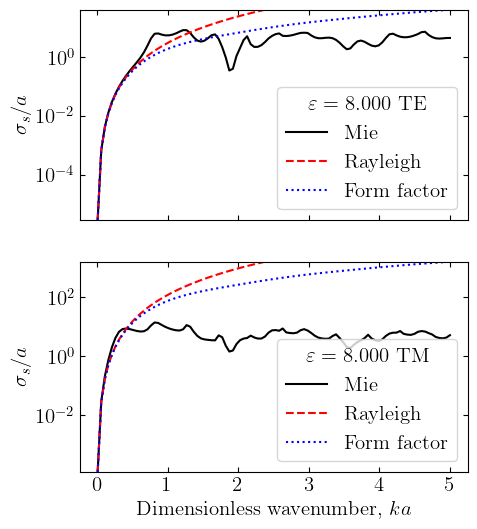

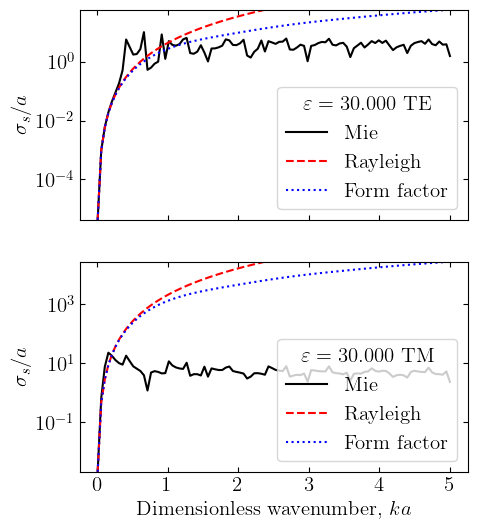

In [52]:
# Full (TE and TM)

x = np.linspace(0.001, 1-0.001, 400)

ka = np.linspace(0.01,5,100)

for eps in [1.01, 4, 8, 30]:
    fig, ax = plt.subplots(2,1,figsize=(5,6),sharex=True)
    y1 = np.zeros((0,2))
    y3 = np.zeros((0,2))

    for q in ka:
        y1 = np.vstack((y1,sigma_C(q, eps)))

        form = FormFactor_2D(q, eps, np.pi*x)
        y3 = np.vstack((y3,np.array([np.trapz(form[:,0], x), np.trapz(form[:,1], x)])*2*np.pi ))
    y2 = sigma_C_Rayleigh(ka, eps)

    for i in range(2):
        ax[i].plot(ka,y1[:,i], 'k-', label='Mie')
        ax[i].plot(ka,y2[:,i], 'r--',label='Rayleigh')
        ax[i].plot(ka,y3[:,i], 'b:',label='Form factor')
        ax[i].set(ylabel=r'$\sigma_s / a$'
           )
        ax[i].set(yscale='log', ylim=[y3[0,i], y3[-1,i]])
    ax[0].legend(title=r'$\varepsilon={:0.3f}$'.format(eps,ka)+' TE')
    ax[1].legend(title=r'$\varepsilon={:0.3f}$'.format(eps,ka)+' TM')
    ax[1].set(xlabel=r'Dimensionless wavenumber, $ka$')


In the following, we will compare the leading order contribution in $\beta=(\varepsilon-1)/(\varepsilon+1)$ for TE [or, $(\varepsilon-1)$ for TM] of the Mie `total` scattering cross sections to the Rayleigh prediction and the squared form factors.

We show that for TE, the leading-order contribution of the Mie differential scattering cross section is approximately the same as the squared form factor in the long-wavelength regime.

For TM, the leading-order contribution of the Mie differential scattering cross section is exactly the same as the squared form factor for all wavenumbers.

In [57]:
# Weak-contrast regime: 

x = np.linspace(0.001, 1-0.001, 400)
ka = np.linspace(0.01,5,100)

eps = 1.01
beta= (eps-1)/(eps+1)

y1 = np.zeros((0,2))
y3 = np.zeros((0,2))

for q in ka:
    y1 = np.vstack((y1,sigma_C(q, eps, 50, True)))
    form = FormFactor_2D(q, eps, np.pi*x)
    y3 = np.vstack((y3,np.array([np.trapz(form[:,0], x), np.trapz(form[:,1], x)])*2*np.pi ))
y2 = sigma_C_Rayleigh(ka, eps)

[Text(0.5, 0, 'Dimensionless wavenumber, $ka$')]

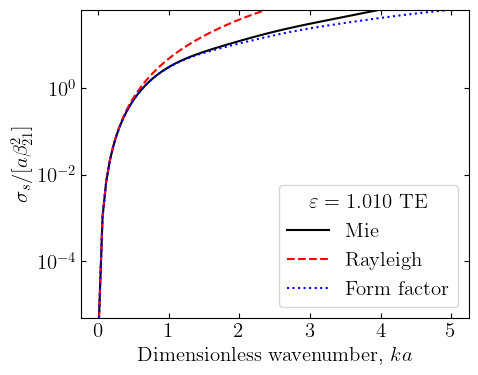

In [58]:
# TE, leading-order in \beta
fig, ax = plt.subplots(1,1,figsize=(5,4),sharex=True)

i=0
y1[:,i] /= beta**2
y2[:,i] /= beta**2
y3[:,i] /= beta**2
ax.plot(ka,y1[:,i], 'k-', label='Mie')
ax.plot(ka,y2[:,i], 'r--',label='Rayleigh')
ax.plot(ka,y3[:,i], 'b:',label='Form factor')
ax.set(ylabel=r'$\sigma_s / [a \beta_{21}^2]$'
    )

ax.set(yscale='log', ylim=[y3[0,i], y3[-1,i]])
ax.legend(title=r'$\varepsilon={:0.3f}$'.format(eps,ka)+' TE')
#ax[1].legend(title=r'$\varepsilon={:0.3f}$'.format(eps,ka)+' TM')
ax.set(xlabel=r'Dimensionless wavenumber, $ka$')


[Text(0.5, 0, 'Dimensionless wavenumber, $ka$')]

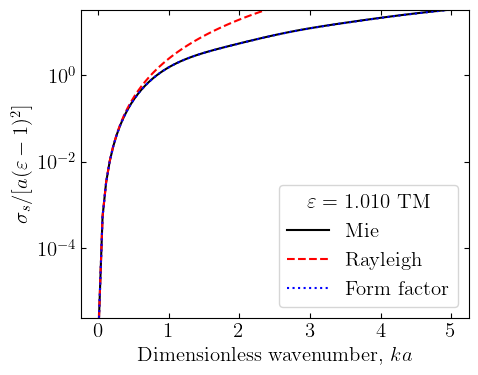

In [59]:
# TM, leading-order in \beta
fig, ax = plt.subplots(1,1,figsize=(5,4),sharex=True)

i=1
y1[:,i] /= (eps-1)**2
y2[:,i] /= (eps-1)**2
y3[:,i] /= (eps-1)**2
ax.plot(ka,y1[:,i], 'k-', label='Mie')
ax.plot(ka,y2[:,i], 'r--',label='Rayleigh')
ax.plot(ka,y3[:,i], 'b:',label='Form factor')
ax.set(ylabel=r'$\sigma_s / [a (\varepsilon-1)^2]$'
    )

ax.set(yscale='log', ylim=[y3[0,i], y3[-1,i]])
ax.legend(title=r'$\varepsilon={:0.3f}$'.format(eps,ka)+' TM')
#ax[1].legend(title=r'$\varepsilon={:0.3f}$'.format(eps,ka)+' TM')
ax.set(xlabel=r'Dimensionless wavenumber, $ka$')


# A single sphere

* A single sphere of radius $a$ and dielectric constant $\varepsilon$ is placed in a vacuum matrix. 
* Linearly polarized light is incident to the cylinder perpendicularly to the axis of this cylinder.
* Transverse polarization is considered.

## Differential scattering cross section

\begin{align}
\frac{d\sigma_s}{d\Omega}
\end{align}
is a function of the dimensionless wavenumber $x=ka$, refractive index $m$, and scattering angle $\theta$.

In [ ]:
%load_ext autoreload
%autoreload 1
%aimport MieSphere



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
## Some closed-form expressions to compare with the Mie scattring cross section.

def dsigma_S_Rayleigh(ka,eps,thetas):
    """
    Dimensionless differential scattering cross section for Rayleigh scattering (sphere), divided by a^2.

    Parameters
    ----------
    ka : float or np.ndarray
        Dimensionless wavenumber (k*a).
    eps : float
        Relative dielectric constant of the sphere.
    thetas : float or np.ndarray
        Scattering angles in radians.

    Returns
    -------
    np.ndarray
        Differential scattering cross section values at scattering angles.
    """
    beta = (eps-1)/(eps+2)
    return ka**4*beta**2*(1+np.cos(thetas)**2)/2

def sigma_S_Rayleigh(ka,eps:float):
    """
    Dimensionless total scattering cross section for Rayleigh scattering (sphere), divided by a^2.

    Parameters
    ----------
    ka : float or np.ndarray
        Dimensionless wavenumber (k*a).
    eps : float
        Relative dielectric constant of the sphere.

    Returns
    -------
    np.ndarray
        Total scattering cross section values.
    """
    beta = (eps-1)/(eps+2)
    return ka**4*beta**2*8*np.pi/3


def FormFactor_3D(ka, eps, thetas):
    beta = (eps-1)/(eps+2)
    b_ = 1/(24*np.pi**2) * (3*beta)**2
    q = 2*ka*np.sin(thetas/2)
    mtile2 = (2*np.pi)**3 *(sp.jv(3/2, q))**2 / q**3
    return b_ * ka**4 * mtile2


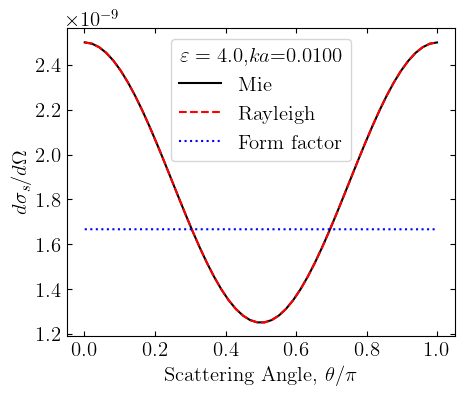

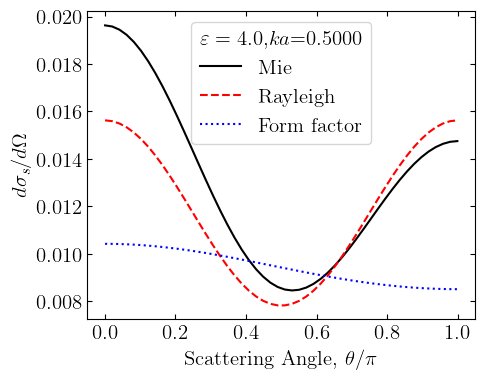

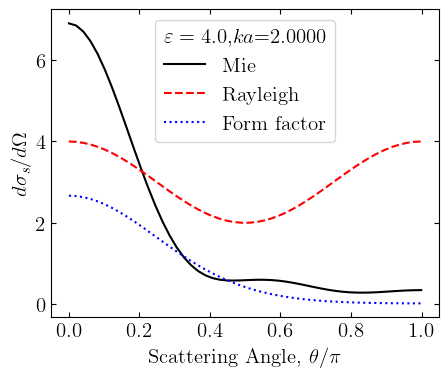

In [13]:
# Comparison to Rayleigh scattering cross section

x = np.linspace(0.001, 1-0.001)
eps = 4
for ka in [0.01,0.5,2]:
    fig, ax = plt.subplots(1,1,figsize=(5,4))

    y1 = dsigma_S(ka, eps, np.pi*x)
    y2 = dsigma_S_Rayleigh(ka, eps, np.pi*x)
    y3 = FormFactor_3D(ka, eps, np.pi*x)

    ax.plot(x,y1, 'k-', label='Mie')
    ax.plot(x,y2, 'r--',label='Rayleigh')
    ax.plot(x,y3, 'b:',label='Form factor')
    ax.legend(title=r'$\varepsilon={:0.1f}$,$ka$={:0.4f}'.format(eps,ka))
    ax.set(xlabel=r'Scattering Angle, $\theta/\pi$', ylabel=r'$d \sigma_s / d \Omega$',
           )

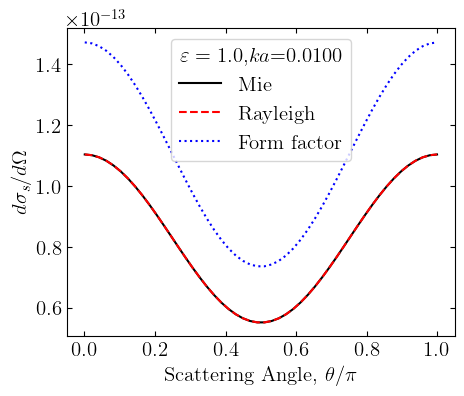

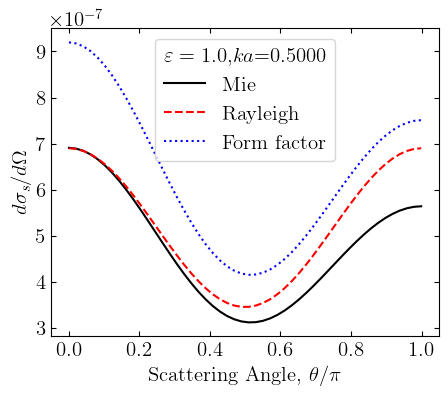

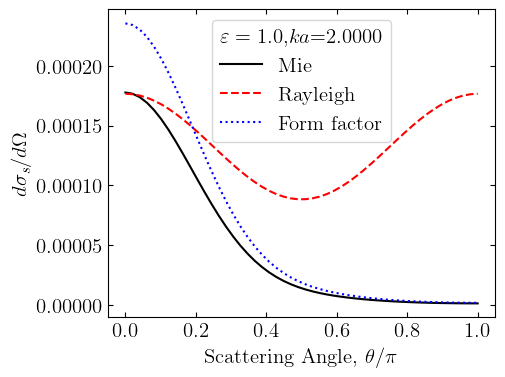

In [ ]:
# Comparison to Rayleigh scattering cross section

x = np.linspace(0.001, 1-0.001)
eps = 1.01
for ka in [0.01,0.5,2]:
    fig, ax = plt.subplots(1,1,figsize=(5,4))

    y1 = dsigma_S(ka, eps, np.pi*x)
    y2 = dsigma_S_Rayleigh(ka, eps, np.pi*x)
    y3 = FormFactor_3D(ka, eps, np.pi*x) #* (1+np.cos(np.pi*x)**2)

    ax.plot(x,y1, 'k-', label='Mie')
    ax.plot(x,y2, 'r--',label='Rayleigh')
    ax.plot(x,y3, 'b:',label='Form factor')
    ax.legend(title=r'$\varepsilon={:0.1f}$,$ka$={:0.4f}'.format(eps,ka))
    ax.set(xlabel=r'Scattering Angle, $\theta/\pi$', ylabel=r'$d \sigma_s / d \Omega$',
           )

## Total scattering cross section

\begin{align}
\sigma_s = \int_{0}^{\pi} d\theta \int_{0}^{2\pi} d \phi \sin(\theta) \frac{d\sigma_s}{d\Omega} 
\end{align}
is a function of the dimensionless wavenumber $x=ka$, and refractive index $m$.

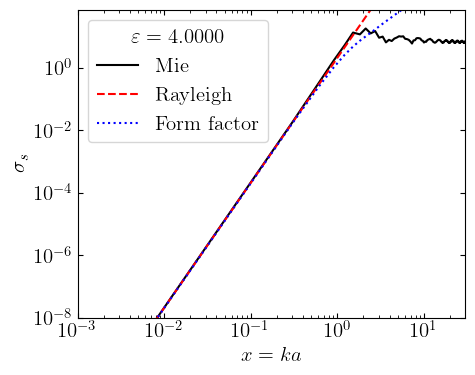

In [21]:
ka = np.linspace(0.001, 30,100)
eps = 4

y1 = sigma_S(ka, eps)
y2 = sigma_S_Rayleigh(ka, eps)

# form factor -> orientational integral
thetas = np.pi*np.linspace(0.001, 1-0.001, 300)
y3 = []
for q in ka:
    dy3 = FormFactor_3D(q, eps, thetas)
    y3.append(2*np.pi*np.trapz(dy3*np.sin(thetas), thetas))

#log-log scale
fig, ax = plt.subplots(1,1,figsize=(5,4))
ax.plot(ka,y1, 'k-', label='Mie')
ax.plot(ka,y2, 'r--',label='Rayleigh')
ax.plot(ka,y3, 'b:',label='Form factor')

ax.set(xlabel=r'$x=ka$', ylabel=r'$\sigma_s$')
ax.set(ylim=[1e-8,np.max(y1)*4], xlim=[1e-3,ka[-1]],\
    xscale='log', yscale='log')
ax.legend(title=r'$\varepsilon={:0.4f}$'.format(eps))


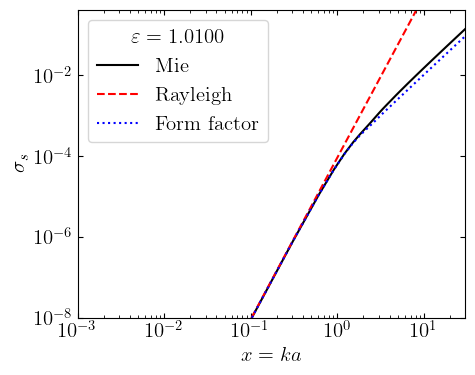

In [34]:
ka = np.linspace(0.001, 30,100)
eps = 1.01

y1 = sigma_S(ka, eps)
y2 = sigma_S_Rayleigh(ka, eps)

# form factor -> orientational integral
thetas = np.pi*np.linspace(0.001, 1-0.001, 300)
y3 = []
for q in ka:
    dy3 = FormFactor_3D(q, eps, thetas)
    y3.append(2*np.pi*np.trapz(dy3*np.sin(thetas), thetas))
y3= np.array(y3)
#log-log scale
fig, ax = plt.subplots(1,1,figsize=(5,4))
ax.plot(ka,y1, 'k-', label='Mie')
ax.plot(ka,y2, 'r--',label='Rayleigh')
ax.plot(ka,y3, 'b:',label='Form factor')

ax.set(xlabel=r'$x=ka$', ylabel=r'$\sigma_s$')
ax.set(ylim=[1e-8,np.max(y1)*3], xlim=[1e-3,ka[-1]],\
    xscale='log', yscale='log')
ax.legend(title=r'$\varepsilon={:0.4f}$'.format(eps))


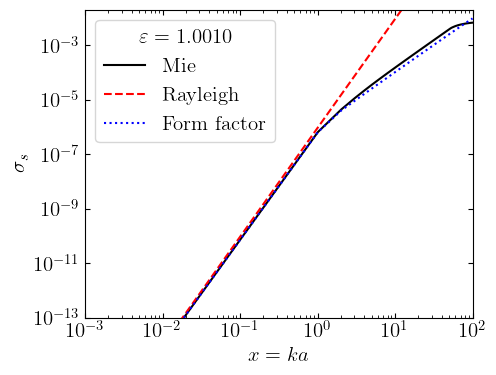

In [26]:
ka = np.linspace(0.001, 100,100)
eps = 1.001

y1 = sigma_S(ka, eps)
y2 = sigma_S_Rayleigh(ka, eps)

# form factor -> orientational integral
thetas = np.pi*np.linspace(0.001, 1-0.001, 300)
y3 = []
for q in ka:
    dy3 = FormFactor_3D(q, eps, thetas)
    y3.append(2*np.pi*np.trapz(dy3*np.sin(thetas), thetas))

#log-log scale
fig, ax = plt.subplots(1,1,figsize=(5,4))
ax.plot(ka,y1, 'k-', label='Mie')
ax.plot(ka,y2, 'r--',label='Rayleigh')
ax.plot(ka,y3, 'b:',label='Form factor')

ax.set(xlabel=r'$x=ka$', ylabel=r'$\sigma_s$')
ax.set(ylim=[1e-13,np.max(y1)*3], xlim=[1e-3,ka[-1]],\
    xscale='log', yscale='log')
ax.legend(title=r'$\varepsilon={:0.4f}$'.format(eps))


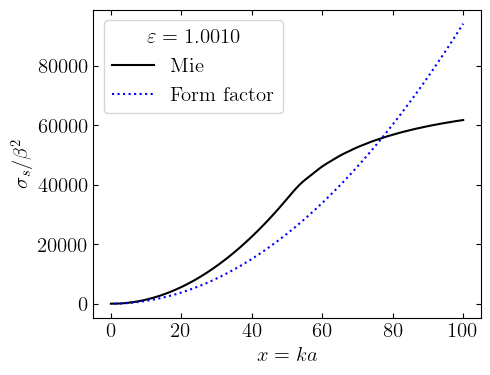

In [38]:
ka = np.linspace(0.001, 100,100)
eps = 1.001

y1 = sigma_S(ka, eps)
# form factor -> orientational integral

y3 = []
for q in ka:
    num = np.max([300,int(round(np.pi*q*20))])

    thetas = np.pi*np.linspace(0.01/q, 1-0.01/q, num)
    dy3 = FormFactor_3D(q, eps, thetas)
    y3.append(2*np.pi*np.trapz(dy3*np.sin(thetas), thetas))
y3= np.array(y3)
beta2 = ((eps-1)/(eps+2))**2

#log-log scale
fig, ax = plt.subplots(1,1,figsize=(5,4))
ax.plot(ka, y1/beta2, 'k-', label='Mie')
ax.plot(ka, y3/beta2, 'b:',label='Form factor')

ax.set(xlabel=r'$x=ka$', ylabel=r'$\sigma_s/\beta^2$')
#ax.set(ylim=[1e-13,np.max(y1)*3], xlim=[1e-3,ka[-1]],\
#    xscale='log', yscale='log')
ax.legend(title=r'$\varepsilon={:0.4f}$'.format(eps))


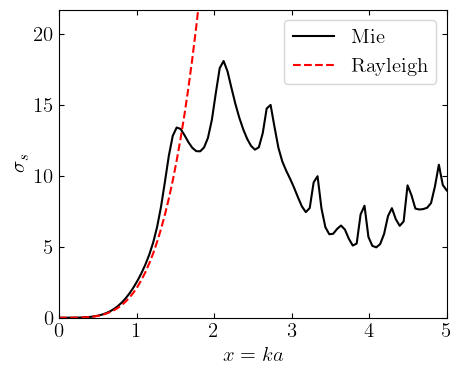

In [62]:
# linear scale
fig, ax = plt.subplots(1,1,figsize=(5,4))
ax.plot(ka,y1, 'k-', label='Mie')
ax.plot(ka,y2, 'r--',label='Rayleigh')

ax.set(xlabel=r'$x=ka$', ylabel=r'$\sigma_s$')
ax.set(ylim=[0,np.max(y1)*1.2], xlim=[0,ka[-1]])
ax.legend()


Notebook for the scattering cross section of a single circular particle in two dimensions